# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [17]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [18]:
apple = pd.read_csv(r"C:\Users\Awendi Joy\OneDrive\Documents\Py Data\Pandas\Time_series\appl_1980_2014.csv")

### Step 3. Assign it to a variable apple

In [19]:
#Done above
apple.describe()

,Open,High,Low,Close,Volume,Adj Close
count,8465.000000,8465.000000,8465.000000,8465.000000,8.465000e+03,8465.000000
mean,98.593926,99.848683,97.226790,98.549199,9.391214e+07,11.095014
std,141.965350,143.155674,140.548326,141.877244,8.993202e+07,21.133016
min,11.120000,11.120000,11.000000,11.000000,2.504000e+05,0.170000
25%,25.750000,26.000000,25.120000,25.630000,3.704960e+07,0.900000
50%,40.750000,41.500000,40.000000,40.750000,6.636000e+07,1.410000
75%,79.500000,81.000000,78.740000,80.000000,1.177701e+08,8.660000
max,702.410000,705.070000,699.570000,702.100000,1.855410e+09,96.280000


### Step 4.  Check out the type of the columns

In [20]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [21]:
apple['Date'] = pd.to_datetime(apple['Date'])

In [11]:
apple.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

### Step 6.  Set the date as the index

In [22]:
apple = apple.set_index("Date")

In [23]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [24]:
apple.index.duplicated().any()

np.False_

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [25]:
apple.sort_index()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [26]:
first_business_days = apple.groupby(apple.index.to_period('M')).first()

In [27]:
apple.index.dtype

dtype('<M8[ns]')

In [28]:
last_business_days = apple.groupby(apple.index.to_period('M')).last()

In [29]:
print(last_business_days.head(10))

          Open   High    Low  Close     Volume  Adj Close
Date                                                     
1980-12  28.75  28.87  28.75  28.75  117258400       0.45
1981-01  34.50  34.75  34.50  34.50    5415200       0.54
1981-02  26.75  26.75  26.63  26.63    5941600       0.41
1981-03  26.63  26.75  26.63  26.63    2940000       0.41
1981-04  24.38  24.38  24.25  24.25    8517600       0.38
1981-05  28.38  28.62  28.38  28.38    4138400       0.44
1981-06  33.13  33.25  33.13  33.13   12812800       0.52
1981-07  25.87  25.87  25.75  25.75   42616000       0.40
1981-08  25.00  25.00  24.75  24.75    3108000       0.39
1981-09  21.38  21.50  21.38  21.38    9256800       0.33


In [30]:
first_business_days = apple.resample('BMS').first() #I was wondering why the outut earlier did not give me the date too, it only gave year and month, so I found this alternative.

In [31]:
last_business_days = apple.resample('BMS').last()

In [32]:
print(last_business_days.head(10))

             Open   High    Low  Close    Volume  Adj Close
Date                                                       
1980-12-01  34.25  34.25  34.13  34.13   8937600       0.53
1981-01-01  28.50  28.50  28.25  28.25  11547200       0.44
1981-02-02  26.50  26.75  26.50  26.50   3690400       0.41
1981-03-02  24.75  24.75  24.50  24.50   3998400       0.38
1981-04-01  28.38  28.62  28.38  28.38   3152800       0.44
1981-05-01  33.13  33.25  33.13  33.13  14845600       0.52
1981-06-01  26.13  26.13  26.00  26.00   8976800       0.41
1981-07-01  25.00  25.12  25.00  25.00   2738400       0.39
1981-08-03  20.13  20.25  20.13  20.13  10236800       0.31
1981-09-01  15.25  15.37  15.25  15.25  12499200       0.24


### Step 10.  What is the difference in days between the first day and the oldest

In [33]:
apple.index.max()

Timestamp('2014-07-08 00:00:00')

In [34]:
apple.index.min()

Timestamp('1980-12-12 00:00:00')

In [35]:
difference_in_days = (apple.index.max() - apple.index.min()).days
print(difference_in_days)

12261


### Step 11.  How many months in the data we have?

In [36]:
apple_months = apple.groupby(apple.index.to_period('M'))

In [37]:
num_months = apple.index.to_period('M').nunique()

In [38]:
print(f"Number of months:", num_months)

Number of months: 404


In [39]:
num_years = apple.index.to_period('Y').nunique()

In [40]:
print(f"Number of year:", num_years)

Number of year: 35


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [41]:
import matplotlib

In [42]:
import matplotlib.pyplot as plt

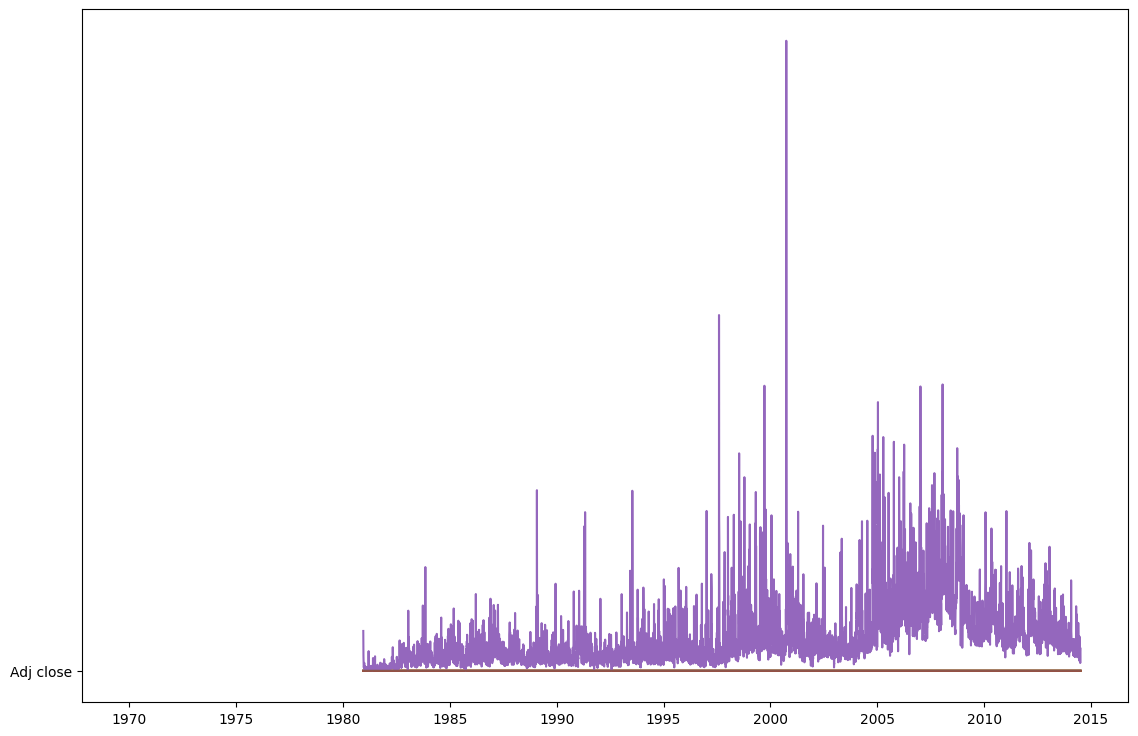

In [43]:
fig = plt.figure(figsize=(13.5,9))
plt.plot(apple.index, apple,['Adj close'])
plt.show()

### BONUS: Create your own question and answer it.
What was the average daily trading volume per year, and in which year was Apple's stock most actively traded?"

In [44]:
apple['Year'] = apple.index.year

In [45]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close,Year
Date,,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,2014
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,2014
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,2014
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,2014
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,2014


In [46]:
apple_y = apple.groupby('Year')

In [ ]:
apple_y['Volume'].mean()/1000 #Average trading volume oer year.

Year
1980     25862.523077
1981      8131.888889
1982     21111.667984
1983     41349.866667
1984     41481.258498
1985     44953.827668
1986     52690.931225
1987     59062.558103
1988     40803.337549
1989     50501.811111
1990     43875.435573
1991     56667.639526
1992     40490.072441
1993     55783.525692
1994     56702.277778
1995     73677.122222
1996     52356.516535
1997     71110.039526
1998    114279.955556
1999    136014.588889
2000    119346.822222
2001     95421.166129
2002     76402.705556
2003     70664.933333
2004    120834.988889
2005    180953.355556
2006    214839.607570
2007    246011.937849
2008    282590.124506
2009    142116.752778
2010    149826.316667
2011    123074.741667
2012    131964.204400
2013    101608.700000
2014     72652.417829
Name: Volume, dtype: float64

In [56]:
av_vol = apple_y['Volume'].mean()/1000 #Average trading volume oer year.

In [63]:
av_vol.sort_values(ascending = False)

Year
2008    282590.124506
2007    246011.937849
2006    214839.607570
2005    180953.355556
2010    149826.316667
2009    142116.752778
1999    136014.588889
2012    131964.204400
2011    123074.741667
2004    120834.988889
2000    119346.822222
1998    114279.955556
2013    101608.700000
2001     95421.166129
2002     76402.705556
1995     73677.122222
2014     72652.417829
1997     71110.039526
2003     70664.933333
1987     59062.558103
1994     56702.277778
1991     56667.639526
1993     55783.525692
1986     52690.931225
1996     52356.516535
1989     50501.811111
1985     44953.827668
1990     43875.435573
1984     41481.258498
1983     41349.866667
1988     40803.337549
1992     40490.072441
1980     25862.523077
1982     21111.667984
1981      8131.888889
Name: Volume, dtype: float64

In [60]:
highest_volume = av_vol.max()

In [61]:
highest_year = av_vol.idxmax()

In [62]:
print(f"The year with the highest average trading volume is:", highest_year)
print(f"The highest average trading volume is:", highest_volume)

The year with the highest average trading volume is: 2008
The highest average trading volume is: 282590.1245059289


In [67]:
apple_y['Volume'].count().sort_values(ascending=False)

Year
1996    254
1992    254
1982    253
1997    253
1991    253
1984    253
1985    253
1990    253
1988    253
1986    253
1987    253
1993    253
2008    253
1998    252
1981    252
1989    252
1994    252
1995    252
1983    252
2013    252
1999    252
2002    252
2000    252
2005    252
2004    252
2009    252
2003    252
2010    252
2011    252
2007    251
2006    251
2012    250
2001    248
2014    129
1980     13
Name: Volume, dtype: int64

The year when Apple's stock was most activelly traded was 1996